# Popularity base Recommendation System

In [63]:
import pandas as pd
import numpy as np

### Read Movies Data 

In [64]:
movies = pd.read_csv("D:\Movies\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Read Rating Data

In [65]:
rating = pd.read_csv(r"D:\Movies\ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Merge movies and rating data

In [66]:
movies_data = pd.merge(rating,movies,on="movieId")
movies_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


### Calculate Mean Of the All Movies base on title of the movie

In [67]:
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Straight-Jacket (2004)                                                               5.0
Storefront Hitc

#### I am not select 10 movies because of rating of movies is 5

In [68]:
movies_data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                                   341
Pulp Fiction (1994)                                   324
Shawshank Redemption, The (1994)                      311
Silence of the Lambs, The (1991)                      304
Star Wars: Episode IV - A New Hope (1977)             291
                                                     ... 
Robin Williams: Weapons of Self Destruction (2009)      1
Good German, The (2006)                                 1
Good Earth, The (1937)                                  1
Robot Overlords (2014)                                  1
İtirazım Var (2014)                                     1
Name: rating, Length: 9064, dtype: int64

In [69]:
new_movies = pd.DataFrame(movies_data.groupby('title')['rating'].mean())

In [70]:
new_movies['rating_count'] = movies_data.groupby('title')['rating'].count()

In [71]:
new_movies.head()

,rating,rating_count
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [72]:
new_movies['rating'] = round(new_movies['rating'],1)

In [73]:
new_movies['rating_count']

title
"Great Performances" Cats (1998)              2
$9.99 (2008)                                  3
'Hellboy': The Seeds of Creation (2004)       1
'Neath the Arizona Skies (1934)               1
'Round Midnight (1986)                        2
                                             ..
xXx (2002)                                   23
xXx: State of the Union (2005)                1
¡Three Amigos! (1986)                        31
À nous la liberté (Freedom for Us) (1931)     1
İtirazım Var (2014)                           1
Name: rating_count, Length: 9064, dtype: int64

In [74]:
import matplotlib.pyplot as plt


<BarContainer object of 9064 artists>

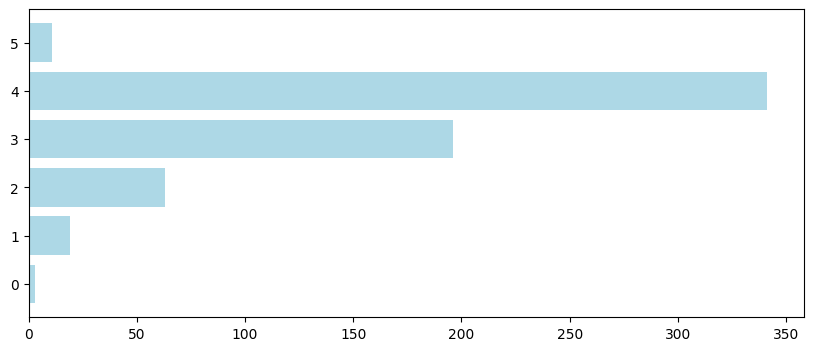

In [76]:
plt.figure(figsize =(10, 4))
plt.barh(new_movies['rating'].round(),new_movies['rating_count'],color='lightblue')

In [78]:
new_movies =  new_movies[(new_movies['rating']>3) & (new_movies['rating_count']>100)]

In [81]:
new_movies.sort_values(by='rating',ascending=False).head(10)

,rating,rating_count
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118
